# EDA Laptop Price

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set(style='darkgrid')

In [28]:
df = pd.read_pickle("../../datasets/processed/laptop_price.pkl")
df.head()

,company,typename,inches,screen_resolution,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_principal_gb,memory_principal_type,memory_secondary_gb,memory_secondary_type,opsys,weight_kg,price_euros
0,Apple,Ultrabook,14-,2560x1600,2560,1600,Intel,2.3,Intel,8,128,ssd,0,empty,macOS,1.37,1339.69
1,Apple,Ultrabook,14-,1440x900,1440,900,Intel,1.8,Intel,8,128,flash storage,0,empty,macOS,1.34,898.94
2,HP,Notebook,14~16,1920x1080,1920,1080,Intel,2.5,Intel,8,256,ssd,0,empty,Outros,1.86,575.00
3,Apple,Ultrabook,14~16,2880x1800,2880,1800,Intel,2.7,AMD,16,512,ssd,0,empty,macOS,1.83,2537.45
4,Apple,Ultrabook,14-,2560x1600,2560,1600,Intel,3.1,Intel,8,256,ssd,0,empty,macOS,1.37,1803.60


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   company                1302 non-null   category
 1   typename               1302 non-null   category
 2   inches                 1302 non-null   category
 3   screen_resolution      1302 non-null   category
 4   x_screen               1302 non-null   int16   
 5   y_screen               1302 non-null   int16   
 6   cpu_manufacturer       1302 non-null   category
 7   cpu_ghz                1302 non-null   float32 
 8   gpu_manufacturer       1302 non-null   category
 9   ram_gb                 1302 non-null   int16   
 10  memory_principal_gb    1302 non-null   int16   
 11  memory_principal_type  1302 non-null   category
 12  memory_secondary_gb    1302 non-null   int16   
 13  memory_secondary_type  1302 non-null   category
 14  opsys                  1302 non-null   c

In [30]:
df.describe()

,x_screen,y_screen,cpu_ghz,ram_gb,memory_principal_gb,memory_secondary_gb,weight_kg,price_euros
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,1894.396313,1070.423963,2.299001,8.385561,442.930876,168.417819,2.039416,1124.043894
std,494.632661,284.250096,0.506467,5.085166,356.180662,402.746234,0.665274,699.158856
min,1366.000000,768.000000,0.900000,2.000000,8.000000,0.000000,0.690000,174.000000
25%,1600.000000,900.000000,2.000000,4.000000,256.000000,0.000000,1.500000,599.000000
50%,1920.000000,1080.000000,2.500000,8.000000,256.000000,0.000000,2.040000,978.000000
75%,1920.000000,1080.000000,2.700000,8.000000,512.000000,0.000000,2.300000,1488.435000
max,3840.000000,2160.000000,3.600000,64.000000,2000.000000,2000.000000,4.700000,6099.000000


In [31]:
df.describe(exclude=['int16', 'float32', 'float64'])

,company,typename,inches,screen_resolution,cpu_manufacturer,gpu_manufacturer,memory_principal_type,memory_secondary_type,opsys
count,1302,1302,1302,1302,1302,1302,1302,1302,1302
unique,19,6,3,15,2,3,4,4,4
top,Dell,Notebook,14~16,1920x1080,Intel,Intel,ssd,empty,Windows
freq,297,727,871,841,1240,722,843,1094,1125


## Ordenar pelos notebooks mais caros

In [32]:
df.sort_values(by=['price_euros'], ascending=False).head()

,company,typename,inches,screen_resolution,x_screen,y_screen,cpu_manufacturer,cpu_ghz,gpu_manufacturer,ram_gb,memory_principal_gb,memory_principal_type,memory_secondary_gb,memory_secondary_type,opsys,weight_kg,price_euros
196,Razer,Gaming,16+,3840x2160,3840,2160,Intel,2.9,Nvidia,32,1000,ssd,0,empty,Windows,3.49,6099.0
830,Razer,Gaming,16+,3840x2160,3840,2160,Intel,2.9,Nvidia,32,512,ssd,0,empty,Windows,3.49,5499.0
610,Lenovo,Notebook,14~16,3840x2160,3840,2160,Intel,3.1,Nvidia,32,1000,ssd,0,empty,Windows,2.50,4899.0
749,HP,Workstation,16+,1920x1080,1920,1080,Intel,2.9,Nvidia,16,256,ssd,0,empty,Windows,3.00,4389.0
1066,Asus,Gaming,16+,1920x1080,1920,1080,Intel,2.7,Nvidia,64,1000,ssd,0,empty,Windows,3.58,3975.0


In [33]:
def bar_plt(df, column, ax, title=''):
    sns.histplot(data=df, x=column, ax=ax)
    ax.tick_params(axis='x', labelrotation=90)
    if title != '':
        ax.set_xlabel(title.capitalize())
    else:
        ax.set_xlabel(column.capitalize())
    ax.set_ylabel('')

## Histograma e a distribuição

### Preços

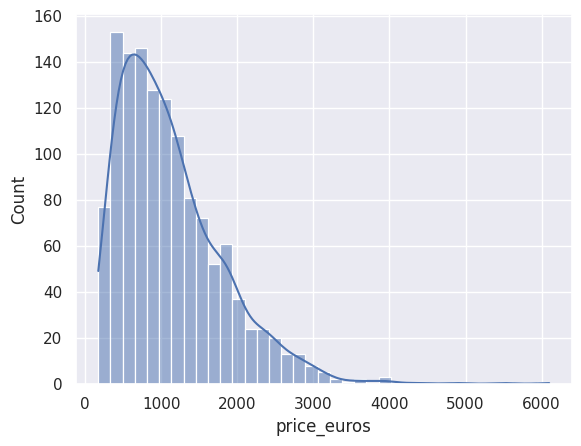

In [34]:
sns.histplot(df['price_euros'], kde=True)
plt.show()

### Fabricante

[]

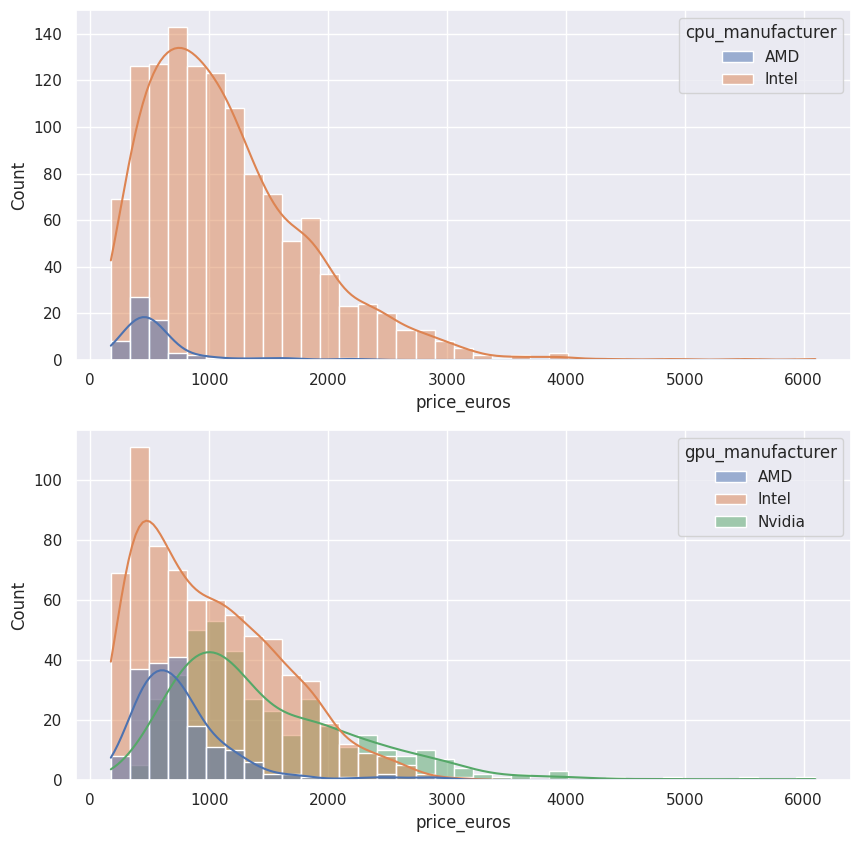

In [35]:
fig, ax = plt.subplots(2, figsize=(10, 10))
valores = {'cpu_manufacturer': ax[0], 'gpu_manufacturer': ax[1]}
for item, ax in valores.items():
    sns.histplot(data=df, x='price_euros', hue=item, ax=ax, kde=True)
plt.plot()

## Histograma e Pie Charts para saber da distribuição desses dados no nosso dataset

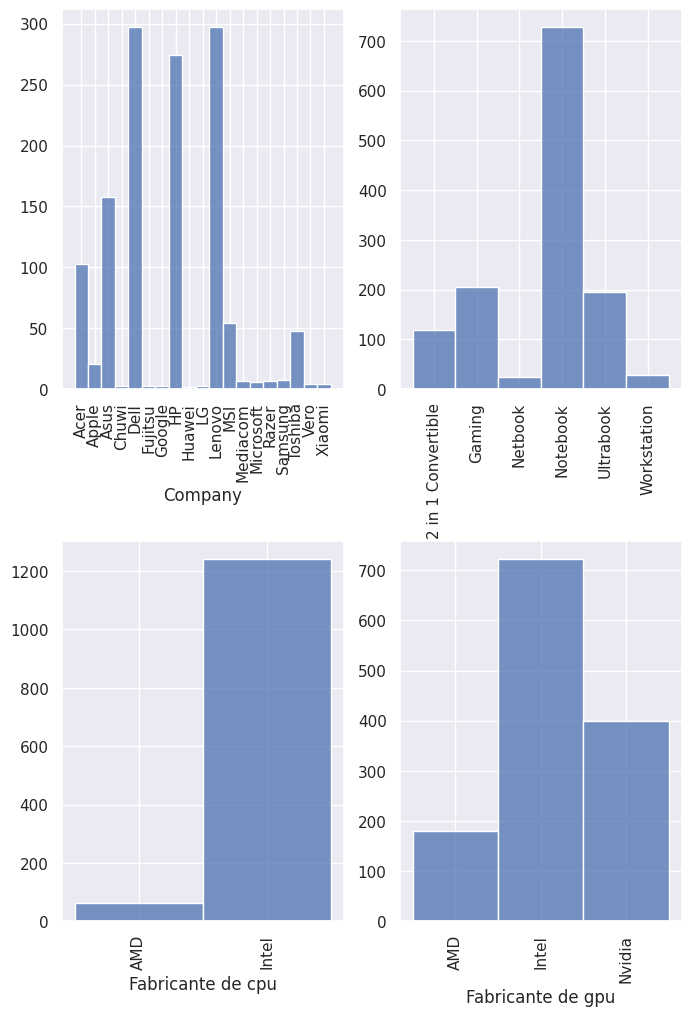

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))
bar_plt(df, 'company', ax[0][0])
bar_plt(df, 'typename', ax[0][1])
bar_plt(df, 'cpu_manufacturer', ax[1][0], 'Fabricante de CPU')
bar_plt(df, 'gpu_manufacturer', ax[1][1], 'Fabricante de GPU')
plt.subplots_adjust(hspace=0.4, top=1.25)
plt.show()

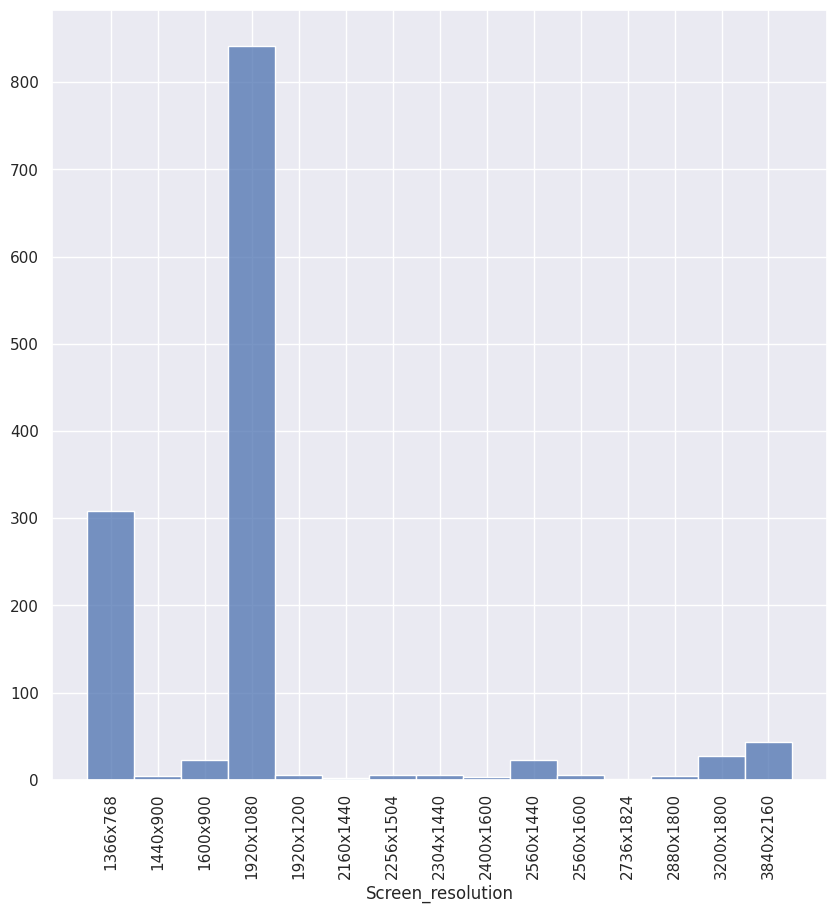

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_plt(df, 'screen_resolution', ax)

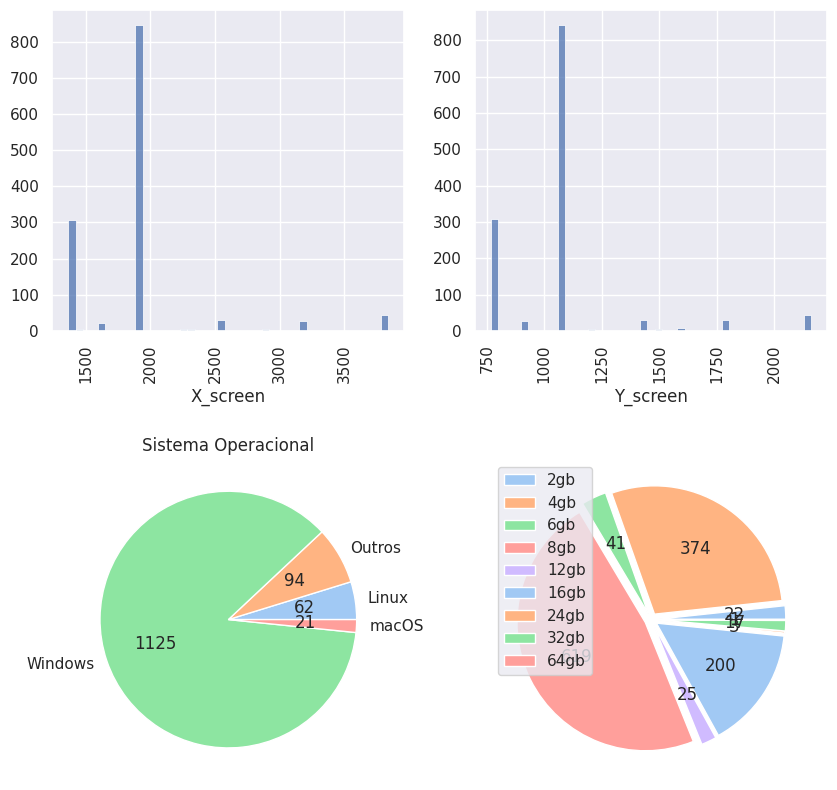

In [38]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
bar_plt(df, 'x_screen', ax[0][0])
bar_plt(df, 'y_screen', ax[0][1])

a = df.groupby(by=["opsys"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[1][0].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[1][0].set_title('Sistema Operacional')

a = df.groupby(by=["ram_gb"]).count().iloc[:, 1]
labels = [ (str(item) + 'gb') for item in list(a.index)]
explode = [ 0.05 for _ in list(a.index)]
ax[1][1] = plt.pie(a.values, explode=explode, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
plt.legend(labels)
plt.subplots_adjust(hspace=0.4)
plt.show()

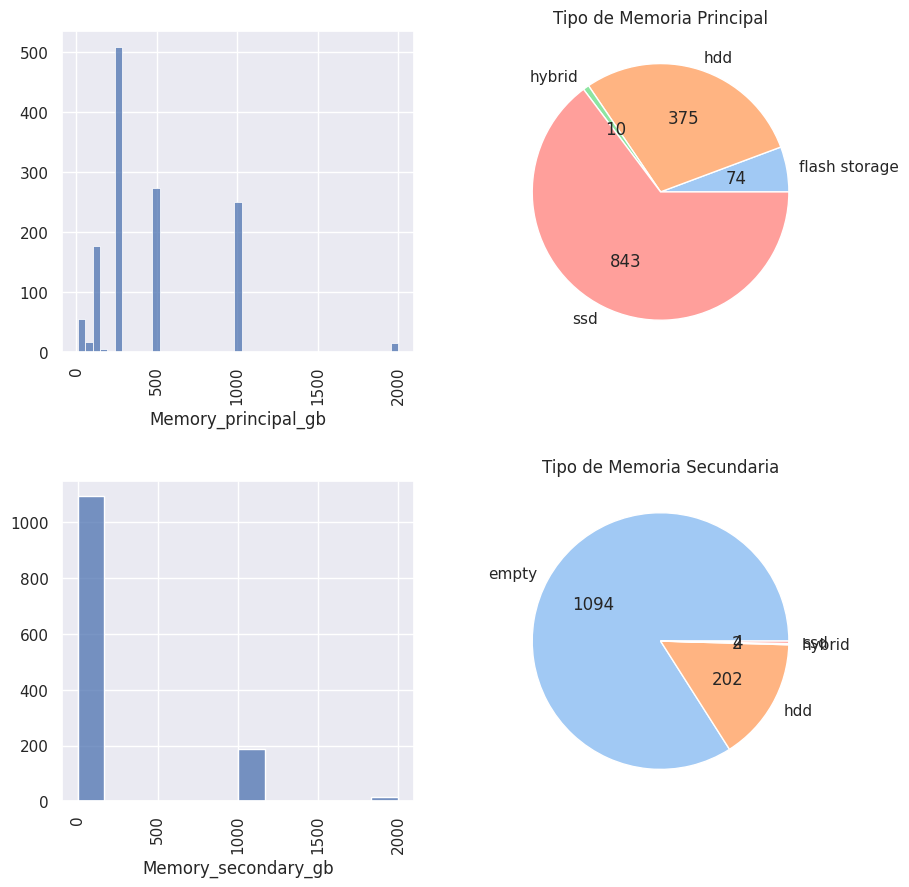

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

bar_plt(df, 'memory_principal_gb', ax[0][0])
a = df.groupby(by=["memory_principal_type"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[0][1].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[0][1].set_title('Tipo de Memoria Principal')

bar_plt(df, 'memory_secondary_gb', ax[1][0])
a = df.groupby(by=["memory_secondary_type"]).count().iloc[:, 1]
labels = a.index
explode = [ 0.05 for _ in list(a.index)]
ax[1][1].pie(a.values, labels=labels, autopct=autopct_format(a.values), colors = sns.color_palette('pastel')[0:5])
ax[1][1].set_title('Tipo de Memoria Secundaria')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Boxplots

### Saber a distribuição de preços por companhia

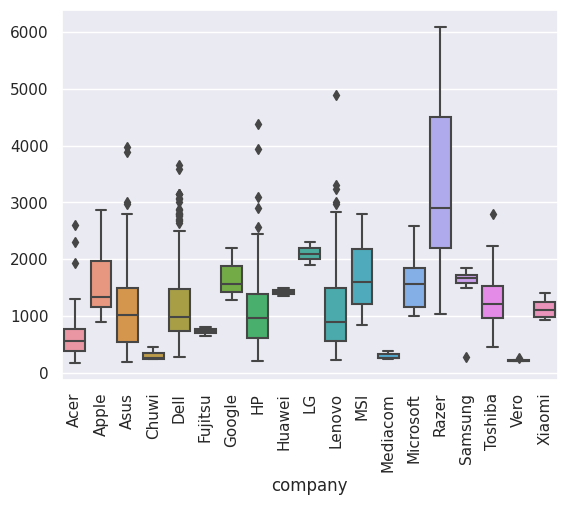

In [40]:
sns.boxplot(data=df, x="company", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

### Saber a distribuição de preços por tipos

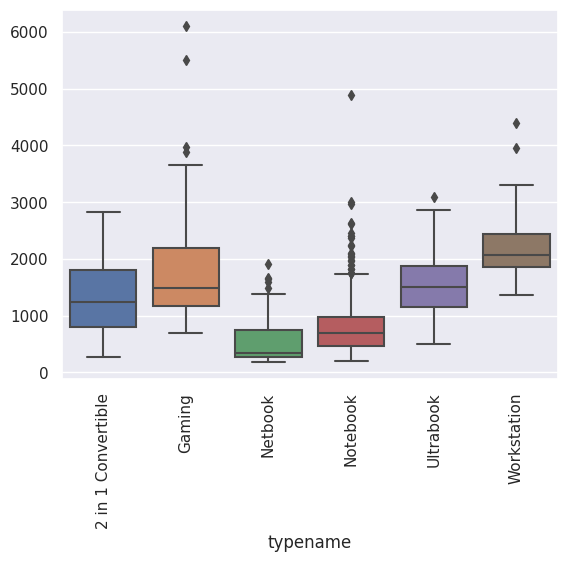

In [41]:
sns.boxplot(data=df, x="typename", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

### Saber a distribuição de preços por tamanho

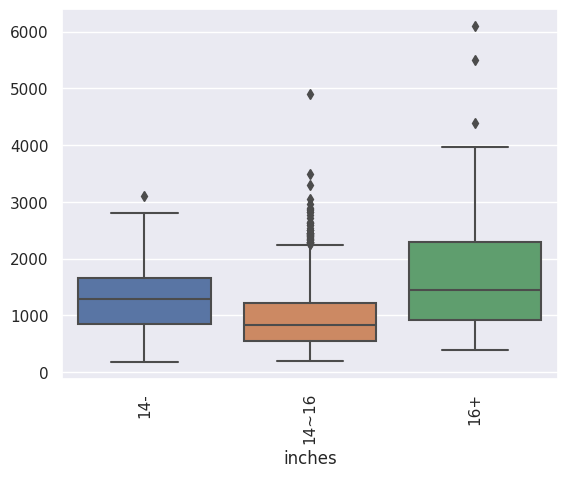

In [42]:
sns.boxplot(data=df, x="inches", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

### Saber a distribuição de preços por ram

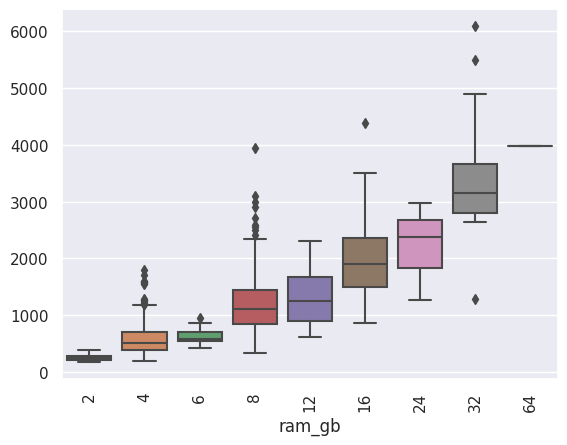

In [43]:
sns.boxplot(data=df, x="ram_gb", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

### Saber a distribuição de preços por SO

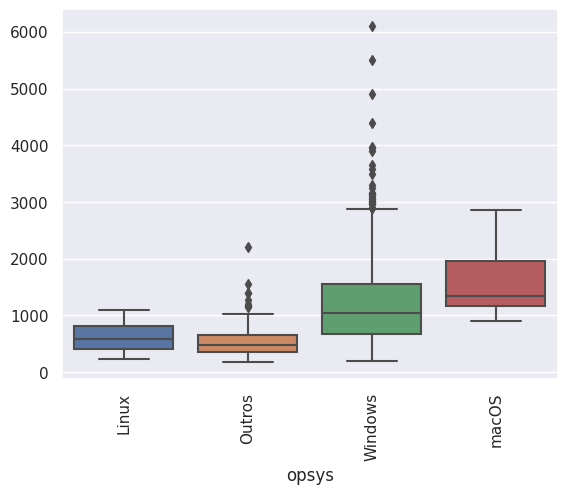

In [44]:
sns.boxplot(data=df, x="opsys", y="price_euros")
plt.xticks(rotation='vertical')
plt.ylabel('')
plt.show()

## Relação entre peso e preço

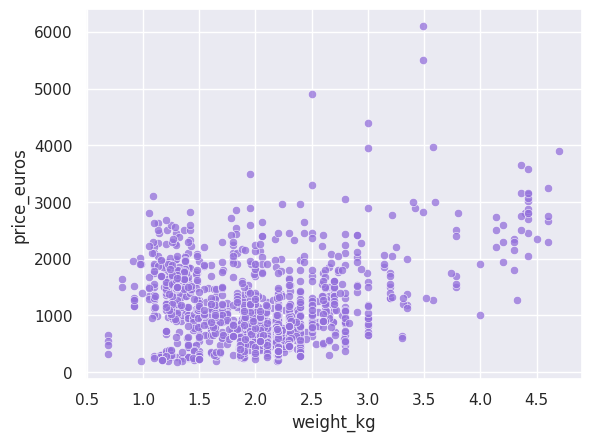

In [45]:
sns.scatterplot(data=df, x="weight_kg", y="price_euros", color = "mediumpurple", alpha = 0.75)
plt.show()

## Média de preços por fabricante

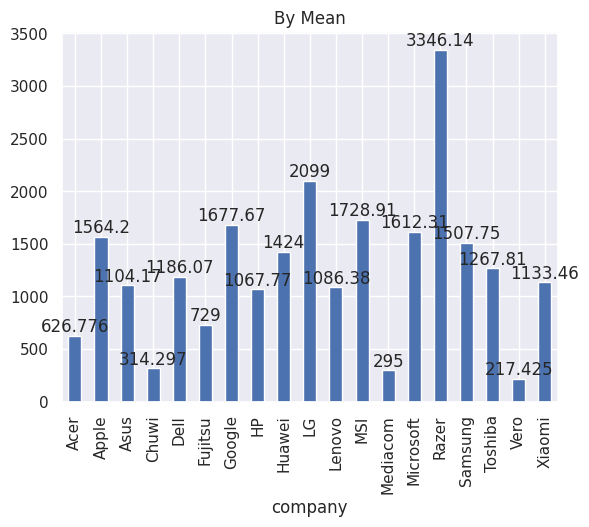

In [46]:
ax = df.groupby(by='company')['price_euros'].mean().plot.bar(rot=90)
for value in ax.containers:
    ax.bar_label(value)
ax.set_title('By Mean')
plt.show()

## Min e Máx de preços por fabricante

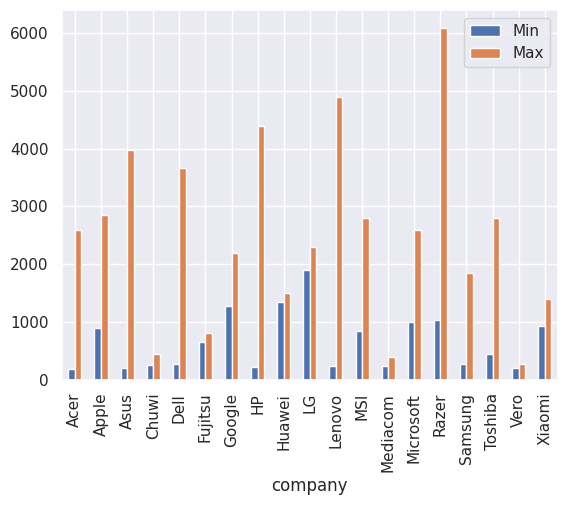

In [47]:
fig, ax = plt.subplots()
table = pd.pivot_table(df, values='price_euros', index='company', aggfunc = ['min', 'max'])
table.plot.bar(ax=ax)
ax.legend(['Min', 'Max'])
plt.show()

## Diferença entre maximo e minimo de preços por fabricante

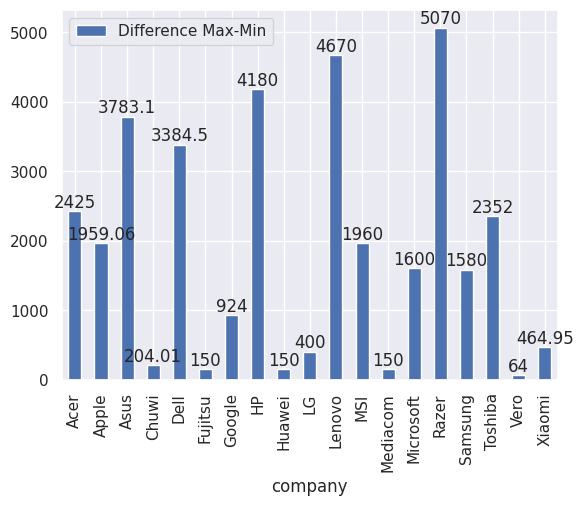

In [48]:
fig, ax = plt.subplots()
table = pd.pivot_table(df, values='price_euros', index='company', aggfunc = 'max') - pd.pivot_table(df, values='price_euros', index='company', aggfunc = 'min')
table.plot.bar(ax=ax)
for value in ax.containers:
    ax.bar_label(value)
ax.legend(['Difference Max-Min'])
plt.show()

## Média de armazenamento por empresas

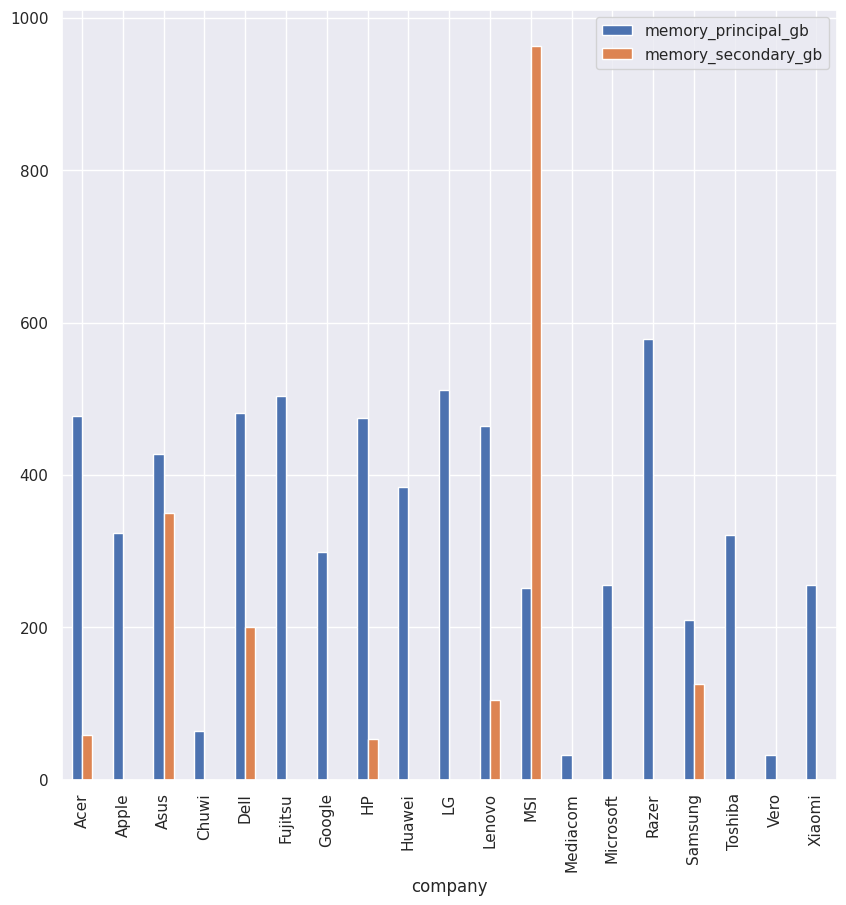

In [49]:
table = pd.pivot_table(df, values=['memory_principal_gb', 'memory_secondary_gb'], index='company', aggfunc = np.mean)
table.plot.bar(figsize=(10,10))
plt.show()

## Correlação entre as variáveis numéricas

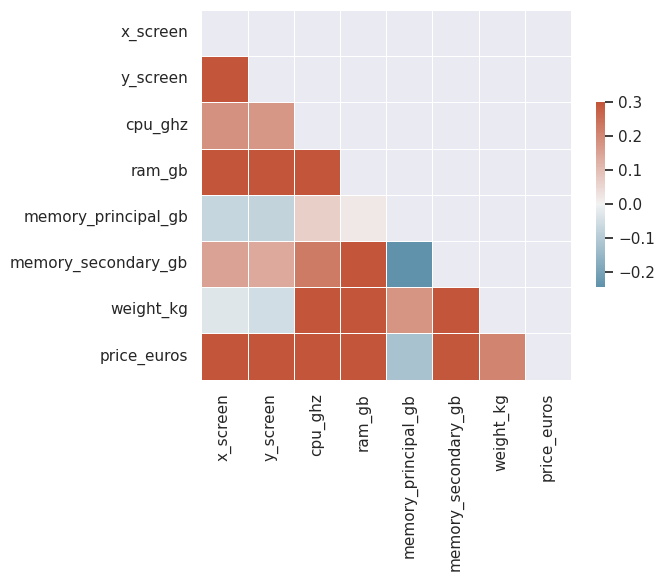

In [50]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()